### Import relevant libraries and loading datasets

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
x_train = pd.read_csv('scaled_feature_drop_na_dengue.csv').drop('Unnamed: 0', axis = 1)
y_train = pd.read_csv('label_drop_na_dengue.csv')['total_cases']

correlated_col = list(x_train.columns)

train_df = x_train.join(y_train)

train_df

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,total_cases
0,-0.122207,-0.253846,-0.095140,-0.328502,-0.814598,-0.808198,-1.190146,-1.926304,-1.171085,0.122086,...,True,False,False,False,False,False,False,False,False,4
1,0.215513,0.064732,-0.580536,-0.587307,-0.573640,-0.340090,-0.634981,-0.901462,-0.837468,0.315202,...,False,True,False,False,False,False,False,False,False,5
2,-0.767304,0.319858,-0.649827,-0.407716,-0.302099,0.077752,-0.289418,0.087186,-0.958783,0.662810,...,False,True,False,False,False,False,False,False,False,4
3,-0.079130,0.917244,0.295500,0.352911,-0.746481,0.228552,-0.011835,0.004322,-0.685825,0.546941,...,False,True,False,False,False,False,False,False,False,3
4,0.403295,1.059203,0.613169,0.486861,-0.928126,0.618119,0.333727,0.345301,-0.534181,0.740057,...,False,True,False,False,False,False,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1.449658,1.528992,0.682269,1.015140,0.178890,0.483027,1.211795,1.014877,1.831463,-0.418637,...,False,True,False,False,False,False,False,False,False,5
1195,0.145949,0.215499,-0.934097,0.233295,0.901068,-0.253170,0.118459,0.766286,1.467517,-1.422839,...,False,False,True,False,False,False,False,False,False,8
1196,0.766413,0.096898,0.601843,0.327518,0.263225,-1.522404,-1.309110,0.131951,0.557655,-1.229723,...,False,False,True,False,False,False,False,False,False,1
1197,1.386571,0.923083,0.985157,1.400717,0.280138,-1.707763,-1.365760,0.013847,0.739627,-1.422839,...,False,False,True,False,False,False,False,False,False,1


### Plots & Insights

<AxesSubplot:>

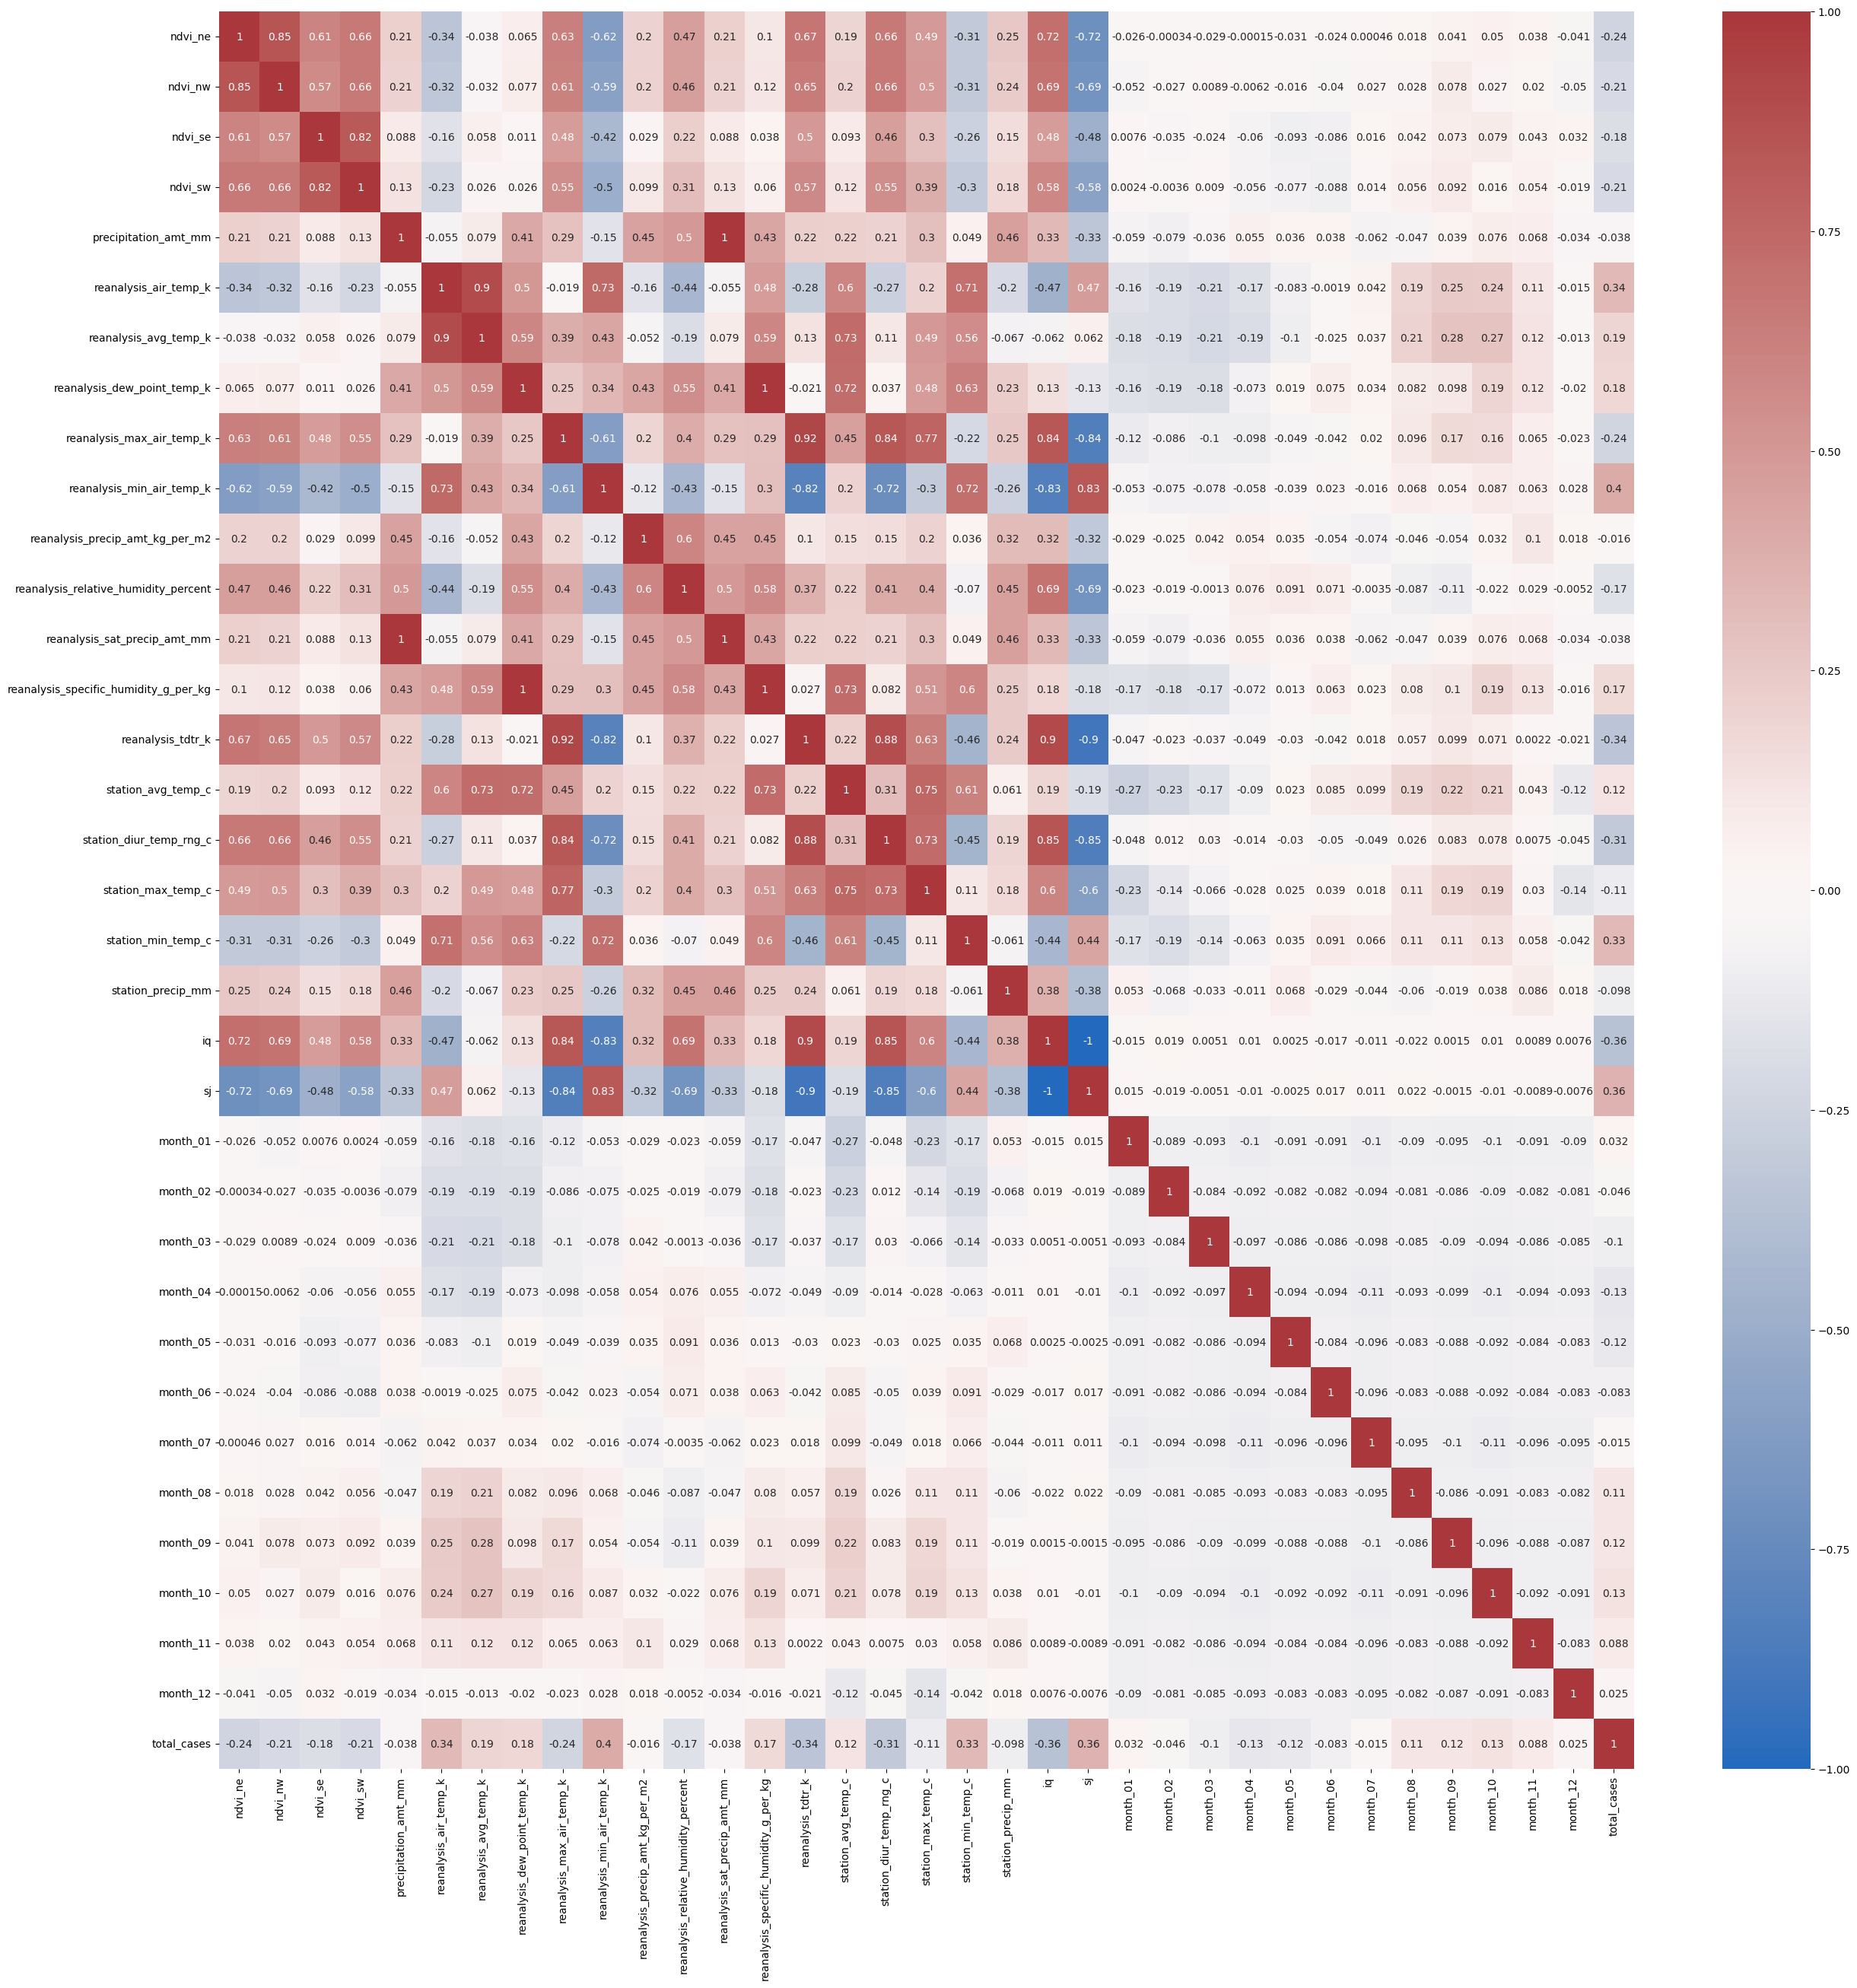

In [81]:
corr_df = train_df.corr()

plt.figure(figsize = (30, 30))
sns.heatmap(corr_df, 
            annot = True, cmap = "vlag", vmin = -1, vmax = 1)

<AxesSubplot:>

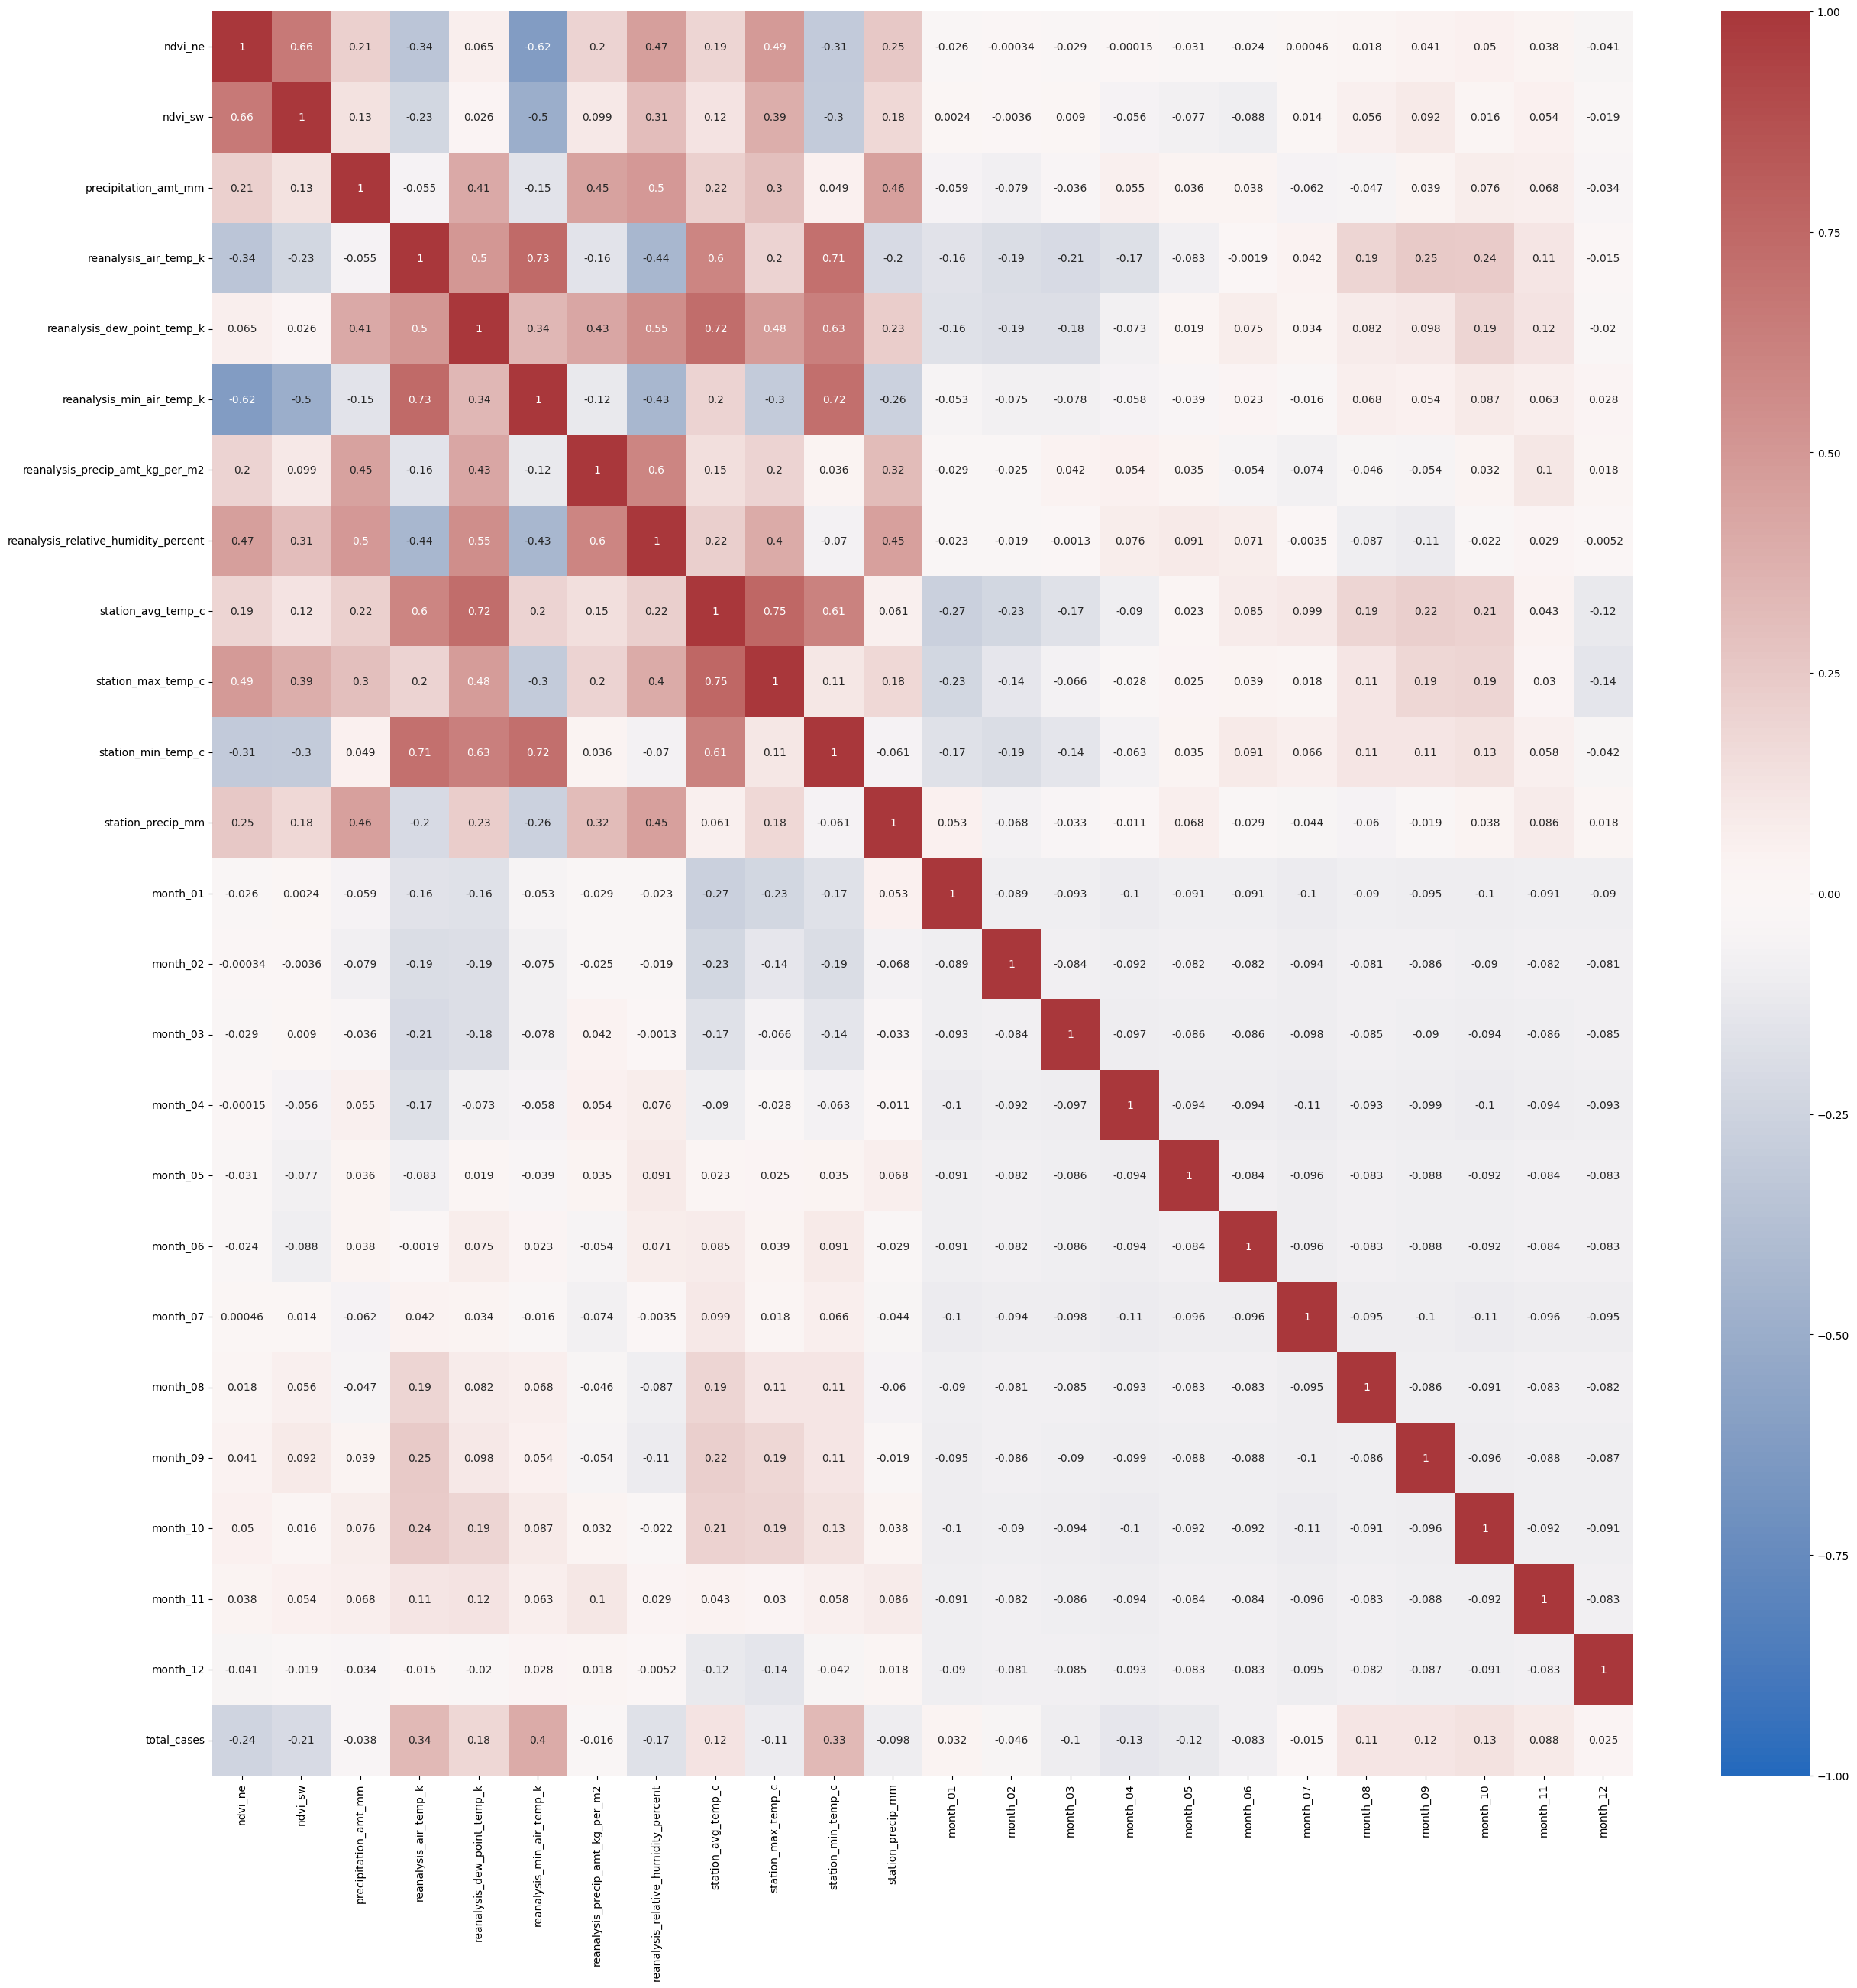

In [82]:
# according to observation

high_corr_features = ['ndvi_nw', 'ndvi_se', 'reanalysis_avg_temp_k', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
                          'station_diur_temp_rng_c', 'reanalysis_max_air_temp_k', 'reanalysis_tdtr_k', 'iq', 'sj']

for high_corr_feature in high_corr_features:
    correlated_col.remove(high_corr_feature)

plt.figure(figsize = (30, 30))
sns.heatmap(corr_df[correlated_col].drop(high_corr_features), 
            annot = True, cmap = "vlag", vmin = -1, vmax = 1)